# Kmeans with Local Expension
___

In [1]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import * 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
output_animation_path = "output/animations"
algorithms_trace = []

## Test

### 1.1 Dolphins

In [4]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [5]:

start_time = time.time()
Cmax, Qmax, Kbest , Labels , trace = local_expansion_kmeans(G, adj_matrix, 2, 16 )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))
    
new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)

algorithms_trace.append({"name": "new_methode", "duration": new_methode_time , "modularity":new_methode_modularity, "nmi":new_methode_nmi, "nb_communities":new_methode_nb_communities})

custom_df_styling(trace)

K = 2
{0: 1.0, 40: 1.0, 14: 1.0}
Chosen clique: [14, 0, 40, 3, 7, 8, 10, 15, 19, 24, 29, 30, 35, 37, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 55, 59, 61]
Centrality: {0: 1.0, 40: 1.0, 14: 1.0}
Centroid: 0
{16: 1.0, 33: 1.0, 38: 1.0}
Chosen clique: [33, 38, 16, 12, 20, 28, 34, 44, 58]
Centrality: {16: 1.0, 33: 1.0, 38: 1.0}
Centroid: 16
[0, 16]
Communities
[[0, 8, 14, 15, 16, 18, 20, 21, 24, 29, 33, 34, 36, 37, 38, 40, 43, 45, 50, 51, 52, 59], [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 17, 19, 22, 23, 25, 26, 27, 28, 30, 31, 32, 35, 39, 41, 42, 44, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 60, 61]]
K = 3
{0: 1.0, 40: 1.0, 14: 1.0}
Chosen clique: [14, 0, 40, 3, 7, 8, 10, 15, 19, 24, 29, 30, 35, 37, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 55, 59, 61]
Centrality: {0: 1.0, 40: 1.0, 14: 1.0}
Centroid: 0
{16: 1.0, 33: 1.0, 38: 1.0}
Chosen clique: [33, 38, 16, 12, 20, 28, 34, 44, 58]
Centrality: {16: 1.0, 33: 1.0, 38: 1.0}
Centroid: 16
{1: 1.0, 27: 1.0, 17: 1.0}
Chosen clique: [1, 17, 27, 6, 9, 13,

K,Modularity,NMI
2,0.303766,0.283942
3,0.387742,0.578261
4,0.350678,0.460046
5,0.338812,0.462744
6,0.339761,0.478354
7,0.334243,0.463189
8,0.405759,0.433024
9,0.363534,0.417287
10,0.347771,0.398554
11,0.328804,0.391521


The animation GIF is saved in output/animations/dolphins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


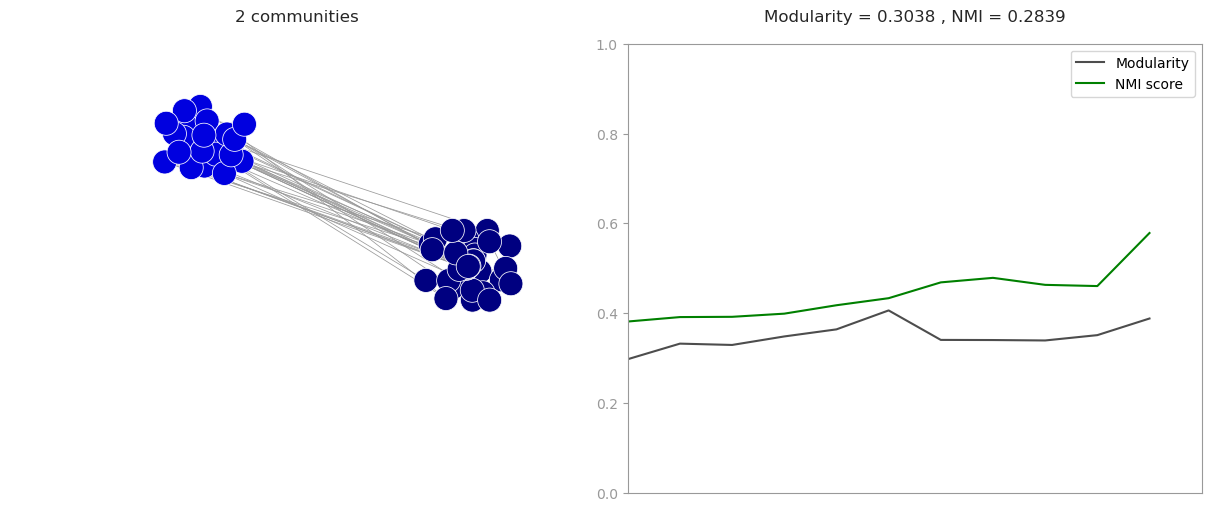

In [12]:

x = clusters_animation(adj_matrix, trace[::-1],dark=False,duration=20,filename=f"{output_animation_path}/dolphins.gif" ,  dpi = 200)

#### Iterated Greedy

In [13]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels,communities_to_labels(G,communitites,original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration":ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### Louvain

In [14]:
start = time.time()
partition , mod = louvain(G) 
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration":louvain_time , "modularity":louvain_mod, "nmi":louvain_nmi, "nb_communities":louvain_nb_communities})


In [15]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration":kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

Communities
[[0, 3, 8, 14, 15, 16, 18, 20, 21, 23, 24, 29, 33, 34, 36, 37, 38, 40, 43, 45, 50, 51, 52, 59], [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 35, 39, 41, 42, 44, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 60, 61]]
Communities
[[0, 2, 3, 4, 7, 10, 11, 12, 19, 22, 23, 25, 26, 27, 28, 30, 31, 35, 39, 42, 44, 46, 47, 48, 49, 53, 55, 56, 58, 59, 60, 61], [1, 5, 6, 9, 13, 17, 32, 41, 54, 57], [8, 14, 15, 16, 18, 20, 21, 24, 29, 33, 34, 36, 37, 38, 40, 43, 45, 50, 51, 52]]
Communities
[[0, 14, 16, 20, 33, 34, 37, 38, 40, 43, 50, 52], [1, 5, 6, 9, 13, 17, 32, 41, 54, 57], [2, 3, 4, 7, 10, 11, 12, 19, 22, 25, 26, 27, 28, 30, 31, 35, 39, 42, 44, 46, 47, 48, 49, 53, 55, 56, 58, 60, 61], [8, 15, 18, 21, 23, 24, 29, 36, 45, 51, 59]]
Communities
[[0, 3, 8, 10, 28, 30, 36, 42, 44, 47], [1, 5, 6, 9, 13, 17, 32, 41, 54, 57], [2, 4, 7, 11, 12, 19, 22, 25, 26, 27, 31, 35, 39, 46, 48, 49, 53, 55, 56, 58, 60, 61], [14, 16, 20, 33, 34, 37, 38, 40, 43, 50, 52], [15, 1

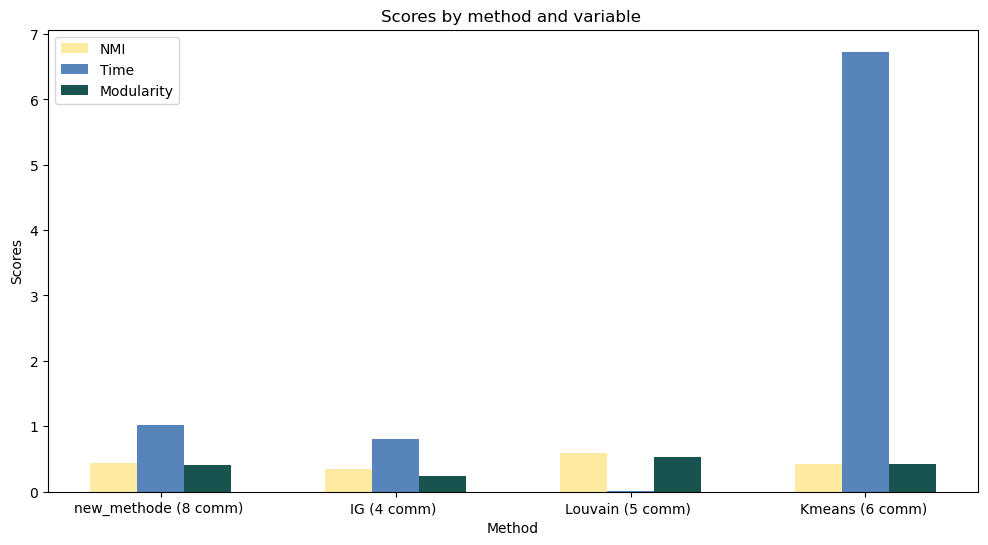

In [16]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')



plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable ')


plt.xticks(index + bar_width, [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

In [17]:
algorithms_trace = []

### 1.2 Karate

In [6]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [7]:

start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)

algorithms_trace.append({"name": "new_methode", "duration": new_methode_time, "modularity": new_methode_modularity,
                        "nmi": new_methode_nmi, "nb_communities": new_methode_nb_communities})

custom_df_styling(trace)

Communities
[[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Communities
[[0, 1, 2, 3, 7, 13, 32, 33], [4, 5, 6, 10, 11, 12, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
Communities
[[0, 1, 2, 3, 7, 13], [4, 5, 6, 10, 11, 12, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 31], [24, 25, 32, 33]]
Communities
[[0, 1, 2, 3, 7, 13], [4, 5, 6, 10, 11, 12, 16, 17, 21], [8, 14, 15, 18, 19, 20, 22, 23, 24, 30, 31], [9, 25, 26, 27, 28, 29], [32, 33]]
Communities
[[0, 1, 2, 3], [4, 5, 6, 10, 11, 16], [7, 12, 13, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 31], [24, 25], [32, 33]]
Communities
[[0, 1, 2, 3], [4, 5, 6, 10, 11, 16], [7, 8, 12, 13, 17, 19, 21], [9, 25, 27, 28], [14, 15, 18, 20, 22, 29, 30], [23, 24, 26, 31], [32, 33]]
Communities
[[0, 1, 2, 3, 7, 13], [4, 5, 6, 10, 16], [8, 31], [9, 26, 27, 28], [11, 12, 17, 19, 21], [14, 15, 18

K,Modularity,NMI
2,0.371466,1.000000
3,0.031969,0.640248
4,0.082101,0.700314
5,0.082101,0.542113
6,0.030079,0.613480
7,0.012492,0.472308
8,0.109796,0.521130
9,-0.037968,0.495210
10,0.003863,0.458929
11,-0.033202,0.470605


The animation GIF is saved in output/animations/karate.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

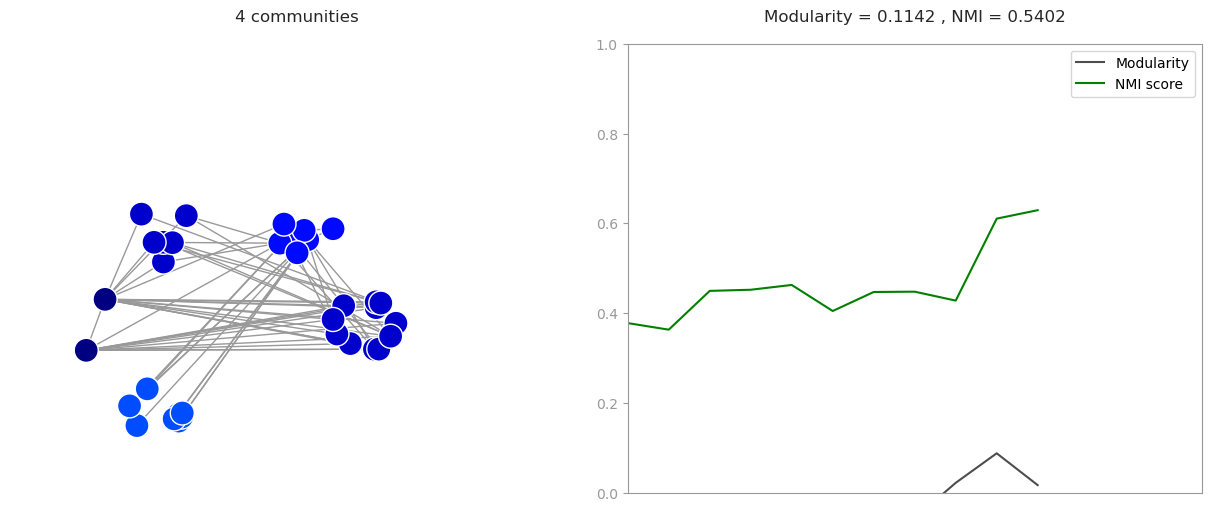

In [20]:

x = clusters_animation(adj_matrix, trace[::-1], dark=False,duration=20,filename=f"{output_animation_path}/karate.gif" ,  dpi = 200)

#### Iterated Greedy

In [ ]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels, communities_to_labels(
    G, communitites, original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration": ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### louvain

In [ ]:
start = time.time()
partition, mod = louvain(G)
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration": louvain_time, "modularity": louvain_mod,
                        "nmi": louvain_nmi, "nb_communities": louvain_nb_communities})

#### kmeans_random

In [ ]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration": kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

Communities
[[0, 1, 2, 32, 33], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
Communities
[[0, 1, 2, 32, 33], [3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21, 24, 25, 31], [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30]]
Communities
[[0, 1, 2, 32, 33], [3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 23, 24, 25, 26, 27, 28, 29, 30, 31], [14, 15, 18, 20, 22]]
Communities
[[0, 32, 33], [1, 2, 3], [4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 23, 24, 25, 26, 27, 28, 29, 30, 31], [14, 15, 18, 20, 22]]
Communities
[[0], [1, 2, 3], [4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 23, 24, 25, 26, 27, 28, 29, 30, 31], [14, 15, 18, 20, 22], [32, 33]]
Communities
[[0], [1, 2, 3], [4, 5, 6, 10, 16], [7, 11, 12, 13, 17, 19, 21], [8, 9, 23, 24, 25, 26, 27, 28, 29, 30, 31], [14, 15, 18, 20, 22], [32, 33]]
Communities
[[0], [1, 2, 3], [4, 5, 6, 10, 16], [7, 11, 12, 13, 17, 19, 21], [8, 9, 26, 27, 28, 29, 30], [14, 15

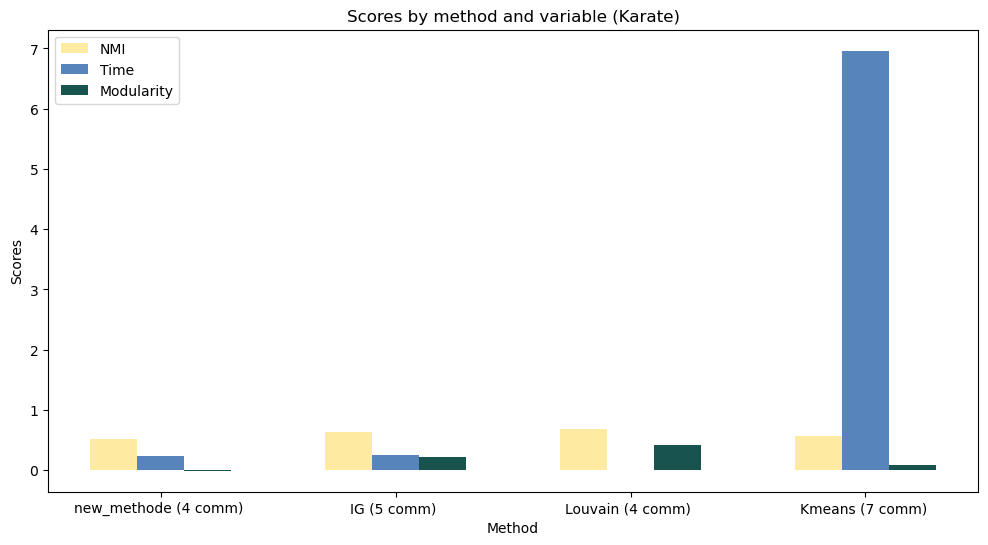

In [ ]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')


plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable (Karate)')


plt.xticks(index + bar_width,
           [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

### Synth Dataset

#### LRF 015

In [21]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [22]:
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat" )

In [23]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 )

K = 2
{0: 1.0, 11: 1.0, 3: 1.0, 9: 1.0}
Chosen clique: [0, 3, 11, 9, 1, 4, 8, 12, 14, 15, 16, 38, 67, 81, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 117]
Centrality: {0: 1.0, 11: 1.0, 3: 1.0, 9: 1.0}
Centroid: 0
{32: 1.0, 17: 1.0, 2: 1.0, 22: 1.0}
Chosen clique: [17, 2, 32, 22, 18, 19, 23, 24, 25, 26, 27, 28, 29, 44, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 105, 106, 107, 108, 110, 112]
Centrality: {32: 1.0, 17: 1.0, 2: 1.0, 22: 1.0}
Centroid: 32
[0, 32]
Communities
[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 38, 67, 81, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 117], [2, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 1

In [24]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.302734,0.577160
3,0.504883,0.857143
4,0.601562,1.000000
5,0.493042,0.942591
6,0.392334,0.890290
7,0.288696,0.843488


The animation GIF is saved in output/animations/LRF015.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


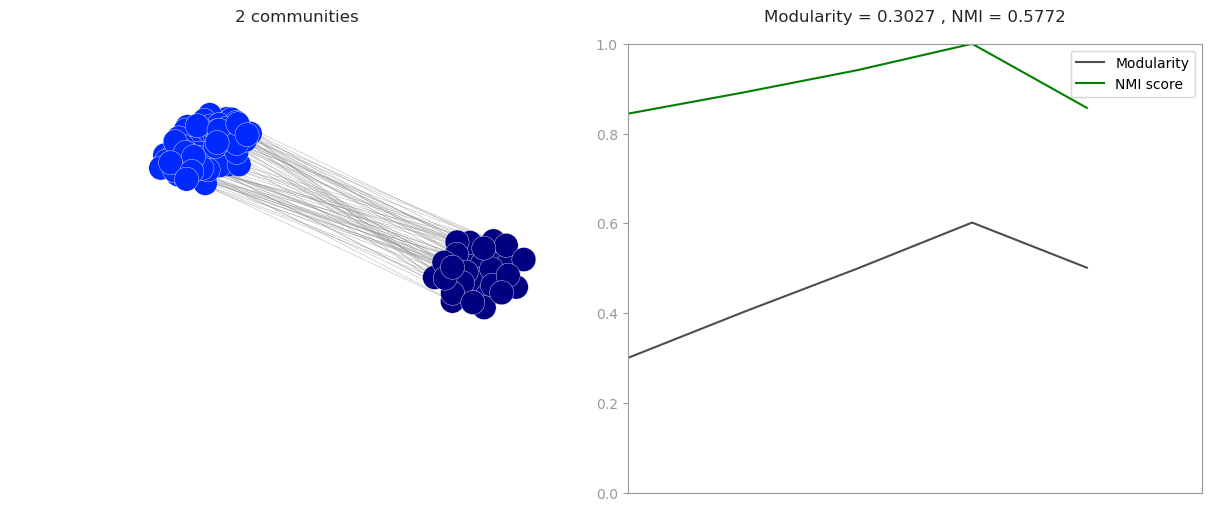

In [ ]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,filename=f"{output_animation_path}/LRF015.gif" ,  dpi = 200)

___

#### LRF040

In [25]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [26]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")

In [27]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

K = 2
{0: 1.0, 1: 1.0, 13: 1.0}
Chosen clique: [0, 1, 13, 14, 23, 49, 77, 79, 80, 83, 85, 86, 99, 100, 103, 109, 115, 116]
Centrality: {0: 1.0, 1: 1.0, 13: 1.0}
Centroid: 0
{18: 1.0, 2: 1.0, 71: 1.0}
Chosen clique: [18, 71, 2, 73, 75, 76, 89, 98, 106, 107, 113, 114, 121, 122, 125, 127]
Centrality: {18: 1.0, 2: 1.0, 71: 1.0}
Centroid: 18
[0, 18]
Communities
[[0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 64, 70, 73, 74, 75, 76, 79, 85, 87, 89, 91, 97, 104, 107, 121, 122, 125], [1, 6, 13, 15, 23, 32, 34, 36, 37, 38, 40, 48, 53, 58, 61, 62, 63, 65, 66, 67, 68, 69, 71, 72, 77, 78, 80, 81, 82, 83, 84, 86, 88, 90, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 126, 127]]
K = 3
{0: 1.0, 1: 1.0, 13: 1.0}
Chosen clique: [0, 1, 13, 14, 23, 49, 77, 79, 80, 83, 85, 86, 99, 100, 103

In [28]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.240234,0.599793
3,0.295776,0.831004
4,0.347656,1.000000
5,0.292969,0.943706
6,0.218384,0.870775
7,0.195557,0.828482


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


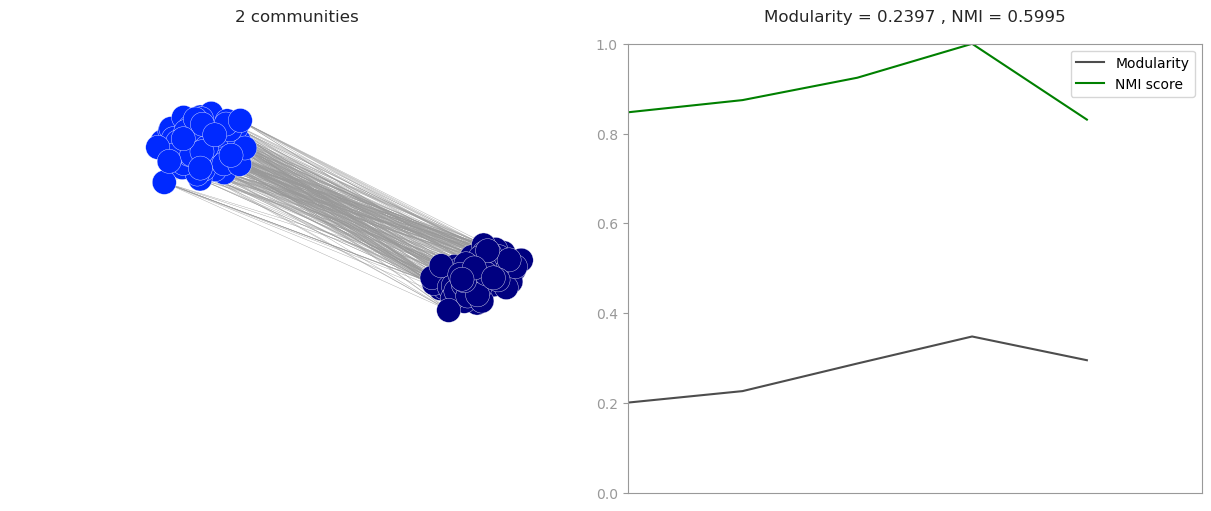

In [ ]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20, filename=f"{output_animation_path}/LRF040.gif" ,  dpi = 200)

___

#### LRF050

In [29]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [30]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [31]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

K = 2
{0: 1.0, 1: 1.0, 16: 1.0}
Chosen clique: [0, 1, 16, 3, 4, 10, 14, 15, 34, 38, 39, 49, 66, 67, 69, 73, 77, 80, 82, 85, 86, 88, 89, 92, 94, 96, 109, 112, 114, 118, 122, 124, 125, 126]
Centrality: {0: 1.0, 1: 1.0, 16: 1.0}
Centroid: 0
{2: 1.0, 19: 1.0, 50: 1.0}
Chosen clique: [19, 2, 50, 5, 26, 31, 35, 36, 46, 47, 55, 65, 72, 74, 102, 103, 110, 111, 115, 117, 121]
Centrality: {2: 1.0, 19: 1.0, 50: 1.0}
Centroid: 2
[0, 2]
Communities
[[0, 1, 4, 6, 7, 8, 12, 15, 17, 19, 20, 23, 29, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 58, 59, 60, 67, 74, 75, 76, 77, 78, 84, 89, 91, 92, 93, 94, 95, 96, 97, 101, 102, 104, 105, 108, 109, 111, 112, 114, 115, 119, 120, 121, 122, 124, 125, 126], [2, 3, 5, 9, 10, 11, 13, 14, 16, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 52, 56, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90, 98, 99, 100, 103, 106, 107, 110, 113, 116, 117, 118, 123, 127]]
K = 3
{0: 1.0, 1: 1.0, 16

In [32]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.121094,0.036575
3,-0.091309,0.155362
4,-0.045776,0.123433
5,-0.051880,0.125205
6,-0.045776,0.165747
7,-0.027588,0.227866


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


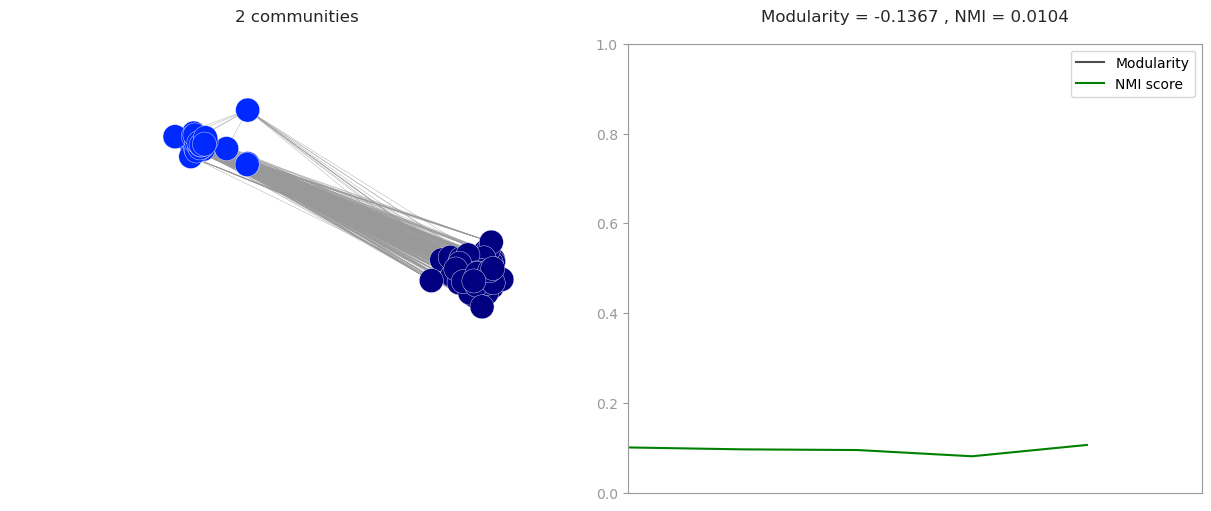

In [ ]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,
                       filename=f"{output_animation_path}/LRF040.gif",  dpi=200)

In [ ]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]


true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [ ]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 , metric="QSim")

K = 2
{0: 1.0, 1: 1.0, 16: 1.0}
Chosen clique: [0, 1, 16, 3, 4, 10, 14, 15, 34, 38, 39, 49, 66, 67, 69, 73, 77, 80, 82, 85, 86, 88, 89, 92, 94, 96, 109, 112, 114, 118, 122, 124, 125, 126]
Centrality: {0: 1.0, 1: 1.0, 16: 1.0}
Centroid: 0
{2: 1.0, 19: 1.0, 50: 1.0}
Chosen clique: [19, 2, 50, 5, 26, 31, 35, 36, 46, 47, 55, 65, 72, 74, 102, 103, 110, 111, 115, 117, 121]
Centrality: {2: 1.0, 19: 1.0, 50: 1.0}
Centroid: 2
[0, 2]
K = 3
{0: 1.0, 1: 1.0, 16: 1.0}
Chosen clique: [0, 1, 16, 3, 4, 10, 14, 15, 34, 38, 39, 49, 66, 67, 69, 73, 77, 80, 82, 85, 86, 88, 89, 92, 94, 96, 109, 112, 114, 118, 122, 124, 125, 126]
Centrality: {0: 1.0, 1: 1.0, 16: 1.0}
Centroid: 0
{2: 1.0, 19: 1.0, 50: 1.0}
Chosen clique: [19, 2, 50, 5, 26, 31, 35, 36, 46, 47, 55, 65, 72, 74, 102, 103, 110, 111, 115, 117, 121]
Centrality: {2: 1.0, 19: 1.0, 50: 1.0}
Centroid: 2
{123: 1.0, 21: 1.0, 6: 1.0}
Chosen clique: [21, 6, 123, 7, 41, 54, 76, 79, 104, 105, 108, 113, 116, 120, 127]
Centrality: {123: 1.0, 21: 1.0, 6: 1.0}
C

In [ ]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.064453,0.010400
3,-0.024109,0.105980
4,-0.018127,0.080739
5,-0.016602,0.094619
6,-0.008789,0.096151
7,-0.005432,0.100423


In [ ]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 7)

K = 2
{0: 1.0, 1: 1.0, 16: 1.0}
Chosen clique: [0, 1, 16, 3, 4, 10, 14, 15, 34, 38, 39, 49, 66, 67, 69, 73, 77, 80, 82, 85, 86, 88, 89, 92, 94, 96, 109, 112, 114, 118, 122, 124, 125, 126]
Centrality: {0: 1.0, 1: 1.0, 16: 1.0}
Centroid: 0
{2: 1.0, 19: 1.0, 50: 1.0}
Chosen clique: [19, 2, 50, 5, 26, 31, 35, 36, 46, 47, 55, 65, 72, 74, 102, 103, 110, 111, 115, 117, 121]
Centrality: {2: 1.0, 19: 1.0, 50: 1.0}
Centroid: 2
[0, 2]
Communities
[[0, 4, 6, 7, 8, 12, 15, 16, 17, 19, 20, 23, 26, 27, 29, 30, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 67, 74, 75, 76, 77, 78, 81, 84, 88, 89, 91, 92, 93, 94, 95, 96, 101, 102, 105, 108, 109, 111, 112, 114, 115, 119, 120, 122, 124], [1, 2, 3, 5, 9, 10, 11, 13, 14, 18, 21, 22, 24, 25, 28, 31, 32, 33, 35, 48, 52, 56, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 79, 80, 82, 83, 85, 86, 87, 90, 97, 98, 99, 100, 103, 104, 106, 107, 110, 113, 116, 117, 118, 121, 123, 125, 126, 127]]
K = 3
{0: 1.0, 1: 1.0, 16